# EDA - IPL Sport 

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_delivery = pd.read_csv("/content/drive/MyDrive/Machine Learning/IPL EDA/deliveries.csv")
df_matches = pd.read_csv("/content/drive/MyDrive/Machine Learning/IPL EDA/matches.csv") 

In [27]:
print(df_delivery.shape, df_matches.shape)

(179078, 21) (756, 18)


In [28]:
df_delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [29]:
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [30]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Null Values

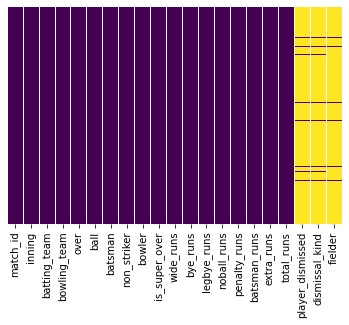

In [31]:
sns.heatmap(df_delivery.isnull(),yticklabels=False,cbar=False,cmap='viridis')

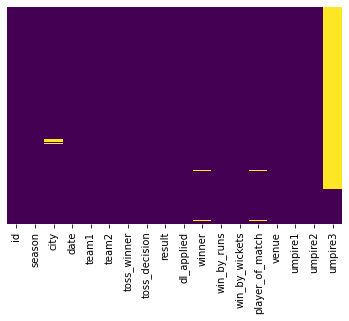

In [32]:
sns.heatmap(df_matches.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
(df_delivery.isnull().sum() / 179078) * 100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [34]:
(df_matches.isnull().sum() / 756) * 100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

## Droping Highly Null Value Columns

In [35]:
df_delivery.drop(["player_dismissed", "dismissal_kind", "fielder"], axis = 1, inplace = True)

In [36]:
df_matches.drop(["umpire3"], axis = 1, inplace = True)

In [37]:
print(df_delivery.shape, df_matches.shape)

(179078, 18) (756, 17)


In [38]:
# Finding the numerical column names on delivery df
delivery_numerical_col = df_delivery._get_numeric_data()
delivery_num_list = delivery_numerical_col.columns.to_list()
delivery_num_list = delivery_num_list[0:len(delivery_num_list)]
delivery_num_list

['match_id',
 'inning',
 'over',
 'ball',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs']

In [39]:
# Finding the categorical column names on delivery df
delivery_categorical_col = list(set(df_delivery.columns) - set(delivery_numerical_col))
delivery_categorical_col

['bowling_team', 'batting_team', 'bowler', 'batsman', 'non_striker']

In [40]:
# Finding the numerical column names on matches df
matches_numerical_col = df_matches._get_numeric_data()
matches_num_list = matches_numerical_col.columns.to_list()
matches_num_list = matches_num_list[0:len(matches_num_list)]
matches_num_list

['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets']

In [41]:
# Finding the categorical column names on delivery df
matches_categorical_col = list(set(df_matches.columns) - set(matches_numerical_col))
matches_categorical_col

['team1',
 'winner',
 'city',
 'result',
 'umpire2',
 'umpire1',
 'toss_decision',
 'player_of_match',
 'venue',
 'toss_winner',
 'date',
 'team2']

### Dropping Null Values

In [42]:
df_delivery_cleaned = df_delivery.dropna()
df_matches_cleaned = df_matches.dropna()
print(df_delivery_cleaned.shape, df_matches_cleaned.shape)

(179078, 18) (743, 17)


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


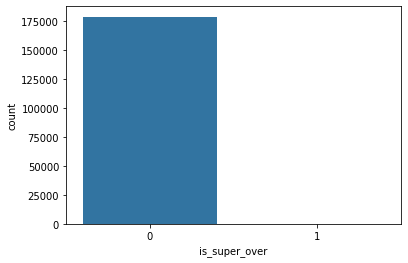

In [43]:
# Super Over in all IPL matches
sns.countplot(df_delivery_cleaned['is_super_over'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


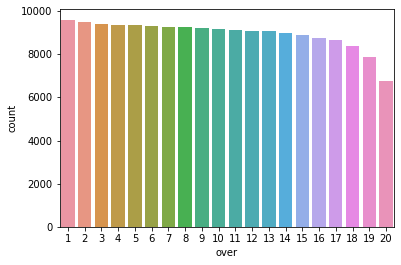

In [44]:
sns.countplot(df_delivery_cleaned['over'])

In [45]:
df_delivery_cleaned.to_csv('df_delivery_cleaned.csv')
df_matches_cleaned.to_csv('df_matches_cleaned.csv')